<a href="https://colab.research.google.com/github/trisha194/Diabetes-Prediction-using-Machine-Learning/blob/main/cat_v_s_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 158MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.8MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout,Input

In [5]:
# generator --- to process the large data into small batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


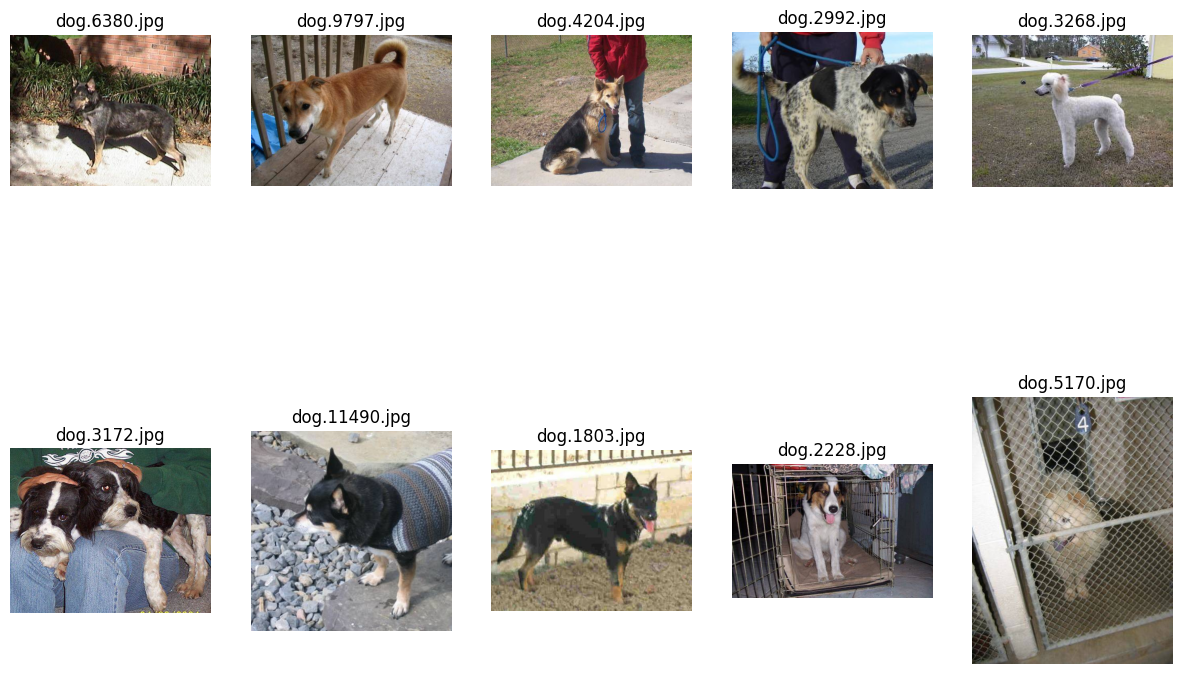

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the folder containing the images
image_folder = 'train/dogs'

# Get a list of image filenames in the folder
image_filenames = os.listdir(image_folder)[:10]  # Get the first 10 images

# Display the images
plt.figure(figsize=(15, 10))
for i, image_name in enumerate(image_filenames):
    img_path = os.path.join(image_folder, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.title(image_name)

plt.show()

In [6]:
# Normalize
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [27]:
import tensorflow as tf

# Assuming you have already defined and normalized the datasets
# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

def check_labels(dataset, num_images=10):
    for image, label in dataset.take(num_images):
        print(f"Label: {label.numpy()}")

# Check labels of the first 10 images in the training dataset
check_labels(train_ds)


Label: [1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1]
Label: [0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
Label: [0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1]
Label: [0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1]
Label: [1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1]
Label: [0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0]
Label: [1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1]
Label: [1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0]
Label: [0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1]
Label: [0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


AttributeError: '_MapDataset' object has no attribute 'size'

In [39]:
# create CNN model

model=Sequential()

# Input layer
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5817 - loss: 1.8611 - val_accuracy: 0.5934 - val_loss: 0.7404
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.7081 - loss: 0.5791 - val_accuracy: 0.7198 - val_loss: 0.5796
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.7836 - loss: 0.4724 - val_accuracy: 0.7696 - val_loss: 0.5272
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8100 - loss: 0.4297 - val_accuracy: 0.7860 - val_loss: 0.4494
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8479 - loss: 0.3513 - val_accuracy: 0.7808 - val_loss: 0.4875
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8797 - loss: 0.2789 - val_accuracy: 0.7736 - val_loss: 0.5603
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.9137 - loss: 0.2097 - val_accuracy: 0.6546 - val_loss: 1.1020
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9381 - loss: 0.1608 - 

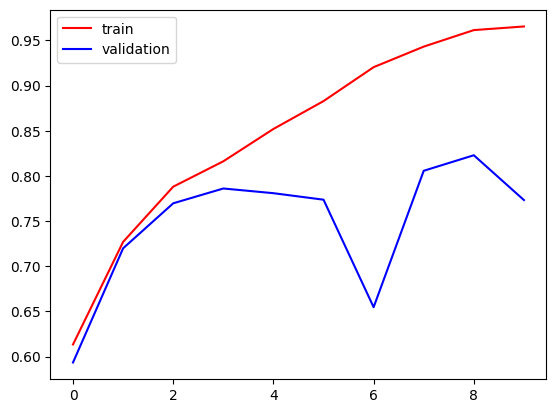

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

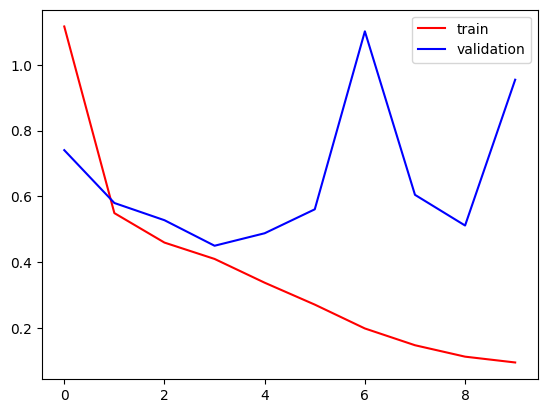

In [44]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# add more data
# data augmentation
# L1/L2 Regularizer
# dropout  (done)
# Batch Norm  (done)
# Reduce complexity

In [45]:
import cv2

In [98]:
test_img=cv2.imread('/content/dog3.jpg')

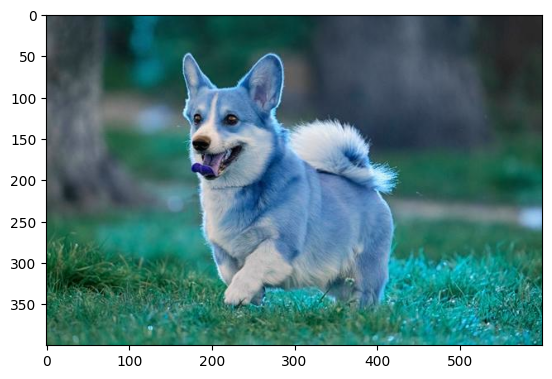

In [99]:
plt.imshow(test_img)

In [100]:
test_img.shape

(400, 600, 3)

In [101]:
test_img=cv2.resize(test_img,(256,256))

In [102]:
test_input=test_img.reshape((1,256,256,3))

In [103]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)

In [86]:
test_img1=cv2.imread('/content/cat7.jpg')

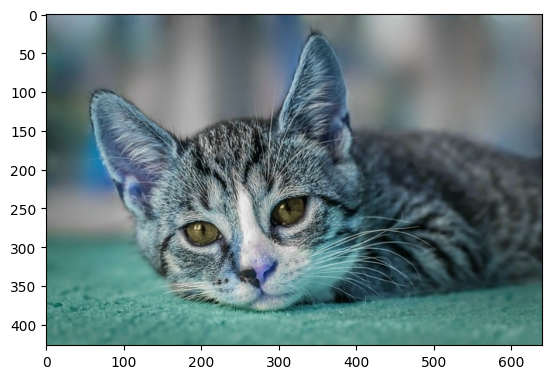

In [87]:
plt.imshow(test_img1)

In [88]:
test_img1.shape

(427, 640, 3)

In [89]:
test_img1=cv2.resize(test_img1,(256,256))

In [90]:
test_input1=test_img1.reshape((1,256,256,3))

In [91]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
def preprocess_and_predict(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return prediction

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    '/content/train',  # Change this path to your actual training directory
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

validation_ds = validation_datagen.flow_from_directory(
    '/content/test',  # Change this path to your actual validation directory
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

In [ ]:
# Predict on New Images
dog_prediction = preprocess_and_predict('/content/dog.jpeg')  # Change to your dog image path
cat_prediction = preprocess_and_predict('/content/cat.jpeg')  # Change to your cat image path

print(f"Dog Prediction: {dog_prediction}")
print(f"Cat Prediction: {cat_prediction}")

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
